In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,7)

## №1. Загрузите данные из файла Mall_Customers.csv

In [3]:
tb = pd.read_csv("Mall_Customers.csv")

## №2. Выведите основную информацию о массиве данных и первые пять строк.

In [4]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
tb.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## №3. Закодируйте с помощью словаря переменную Gender.

In [6]:
gend = {"Male" : 1, "Female" : 0}
tb["Gender"] = tb["Gender"].map(gend)
tb.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## №4. Обучите алгоритм Kmeans в цикле и проверьте сколько кластеров необходимо для данного массива данных с помощью «Метода Локтя».

In [7]:
from sklearn.cluster import KMeans
arr = []
for k in range(1,12):
    kmeans_cl = KMeans(n_clusters = k, random_state = 1)
    kmeans_cl.fit(tb)
    arr.append(kmeans_cl.inertia_)

C:\Users\Arthas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Arthas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Arthas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Arthas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

## №5. Постройте график результатов «Метода локтя».

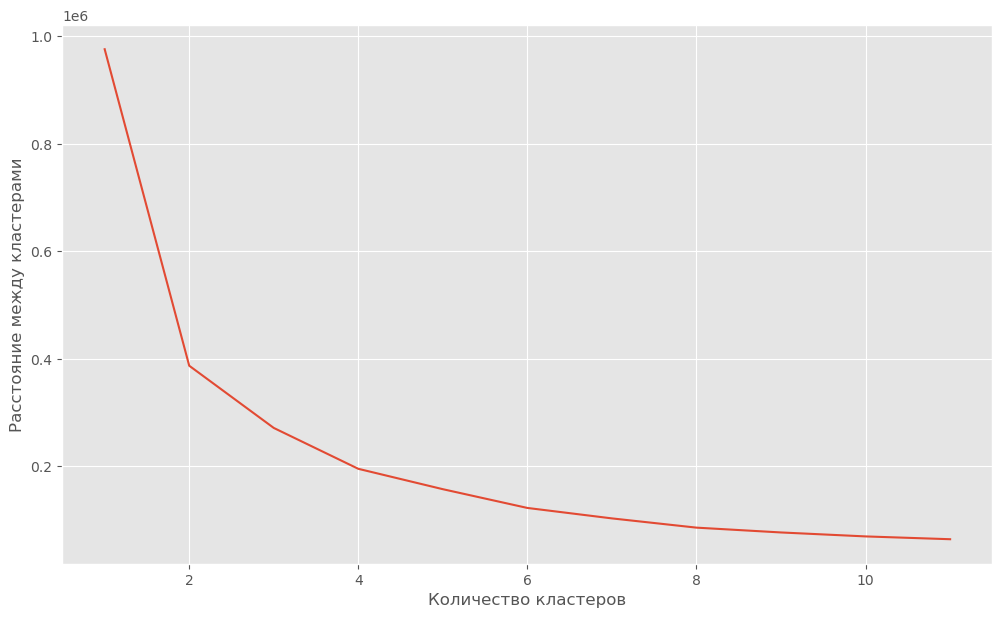

In [8]:
plt.plot(range(1,12), arr)
plt.ylabel('Расстояние между кластерами')
plt.xlabel('Количество кластеров')
plt.show()

#### Из графика видно, что оптимальное число кластеров равно 2, 3 или 4 кластерам

## №6. Снова обучите алгоритм Kmeans и выполните предсказание на массиве данных.

In [9]:
kmeans_cl_2 = KMeans(n_clusters = 4, random_state = 1)
kmeans_cl_2.fit(tb)

C:\Users\Arthas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

## №7. Запишите предскащания в отдельную переменную и добавьте ее в массив данных в последний новый столбец.

In [10]:
y_pred = kmeans_cl_2.labels_
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [11]:
tb['y_pred'] = y_pred
tb.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),y_pred
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


## №8. Отмасштабируйте данные (без нового столбца с классами) с помощью StandardScaller и создайте новую переменную.

In [12]:
from sklearn.preprocessing import StandardScaler
scal_tb = StandardScaler().fit_transform(tb)

## №9. Обучите алгоритмы понижения размерности PCA и TSNE на отмасштабированных данных

In [13]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components = 2, random_state = 1)
tb_pca = pca.fit_transform(scal_tb)

tsne = TSNE(n_components = 2, perplexity = 100, random_state = 1)
tb_tsne = tsne.fit_transform(scal_tb)

C:\Users\Arthas\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Arthas\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## №10. Визуализируйте с помощью функции plt.scatter() результаты понижения размерности каждого метода и раскрасьте точки, используя переменную с классами, полученную после обучения Kmeans.

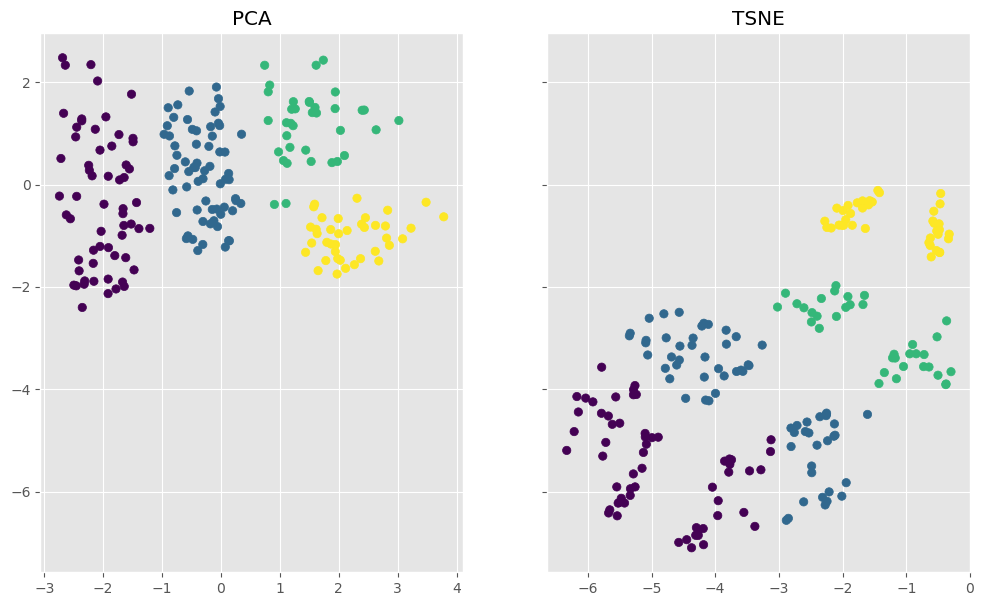

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('PCA')
ax1.scatter(tb_pca[:,0], tb_pca[:,1], c = y_pred)
ax2.set_title('TSNE')
ax2.scatter(tb_tsne[:,0], tb_tsne[:,1], c = y_pred); 

## №11. Обучите алгоритм иерархической кластеризации на первоначальных данных (dendrogram) и постройте дендрограмму.

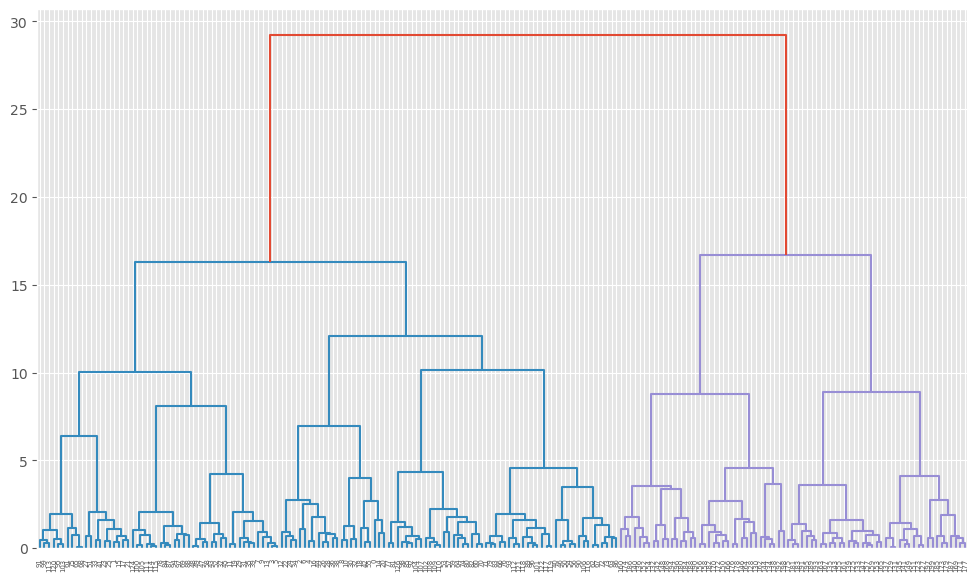

In [15]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
link = linkage(scal_tb, method = "ward")
dend = dendrogram(link)

## №12. Обучите алгоритм метод распространения близости — AffinityPropagation на первоначальных данных и предскажите для каждого объекта класс.

In [16]:
from sklearn.cluster import AffinityPropagation

afp = AffinityPropagation(preference = -200, random_state = 1)
afp.fit(scal_tb)

AffinityPropagation(preference=-200, random_state=1)

In [17]:
y_pred_2 = afp.labels_
y_pred_2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

## №13. Запишите предсказания в отдельную переменную и добавьте ее в массив данных в последний новый столбец.

In [18]:
tb['y_pred_2'] = y_pred_2
tb.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),y_pred,y_pred_2
0,1,1,19,15,39,0,0
1,2,1,21,15,81,0,0
2,3,0,20,16,6,0,0
3,4,0,23,16,77,0,0
4,5,0,31,17,40,0,0


## №14. Визуализируйте с помощью функции plt.scatter() результаты понижения размерности PCA и раскрасьте точки, используя переменную с классами, полученную после обучения AffinityPropagation.

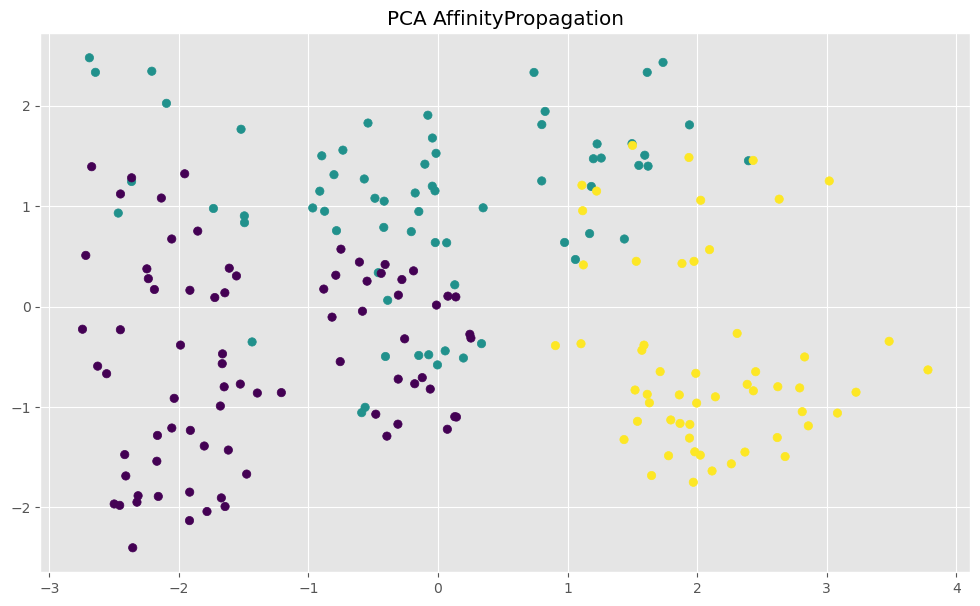

In [19]:
plt.scatter(tb_pca[:,0], tb_pca[:,1], c = y_pred_2)
plt.title("PCA AffinityPropagation")
plt.show()

## №15. Обучите алгоритм MeanShift, подобрав оптимальное количество кластеров на первоначальных данных и предскажите для каждого объекта класс.

In [20]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(scal_tb, quantile = 0.134, random_state = 1)
ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)
ms.fit(scal_tb)

MeanShift(bandwidth=2.011862882071745, bin_seeding=True)

## №16. Запишите предсказания в отдельную переменную и добавьте ее в массив данных в последний новый столбец.

In [21]:
y_pred_3 = ms.labels_
y_pred_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [22]:
tb['y_pred_3'] = y_pred_3
tb.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),y_pred,y_pred_2,y_pred_3
0,1,1,19,15,39,0,0,0
1,2,1,21,15,81,0,0,0
2,3,0,20,16,6,0,0,0
3,4,0,23,16,77,0,0,0
4,5,0,31,17,40,0,0,0


## №17. Визуализируйте с помощью функции plt.scatter() результаты понижения размерности PCA и раскрасьте точки, используя переменную с классами, полученную после обучения MeanShift.

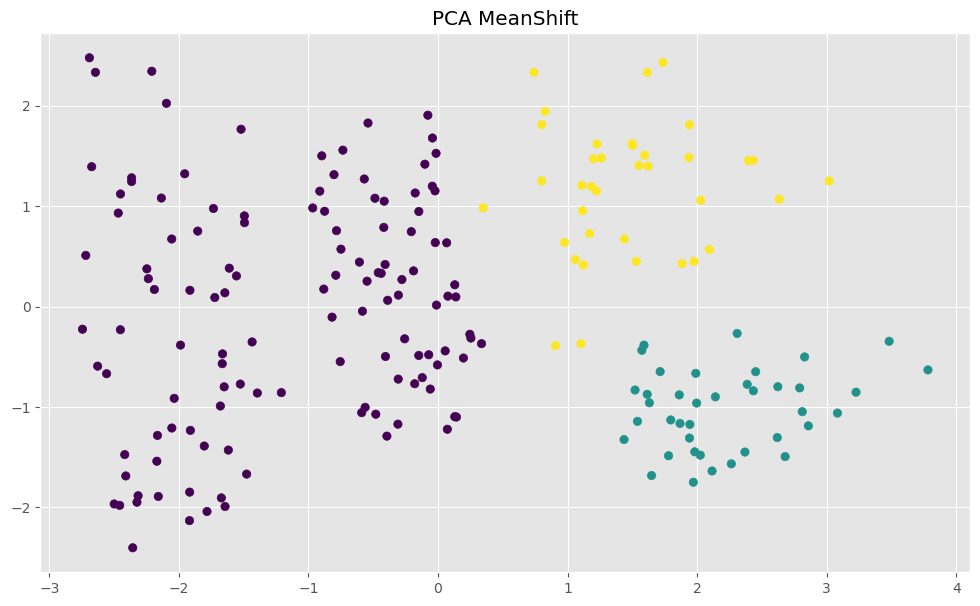

In [23]:
plt.scatter(tb_pca[:,0], tb_pca[:,1], c = y_pred_3)
plt.title("PCA MeanShift")
plt.show()

#### Визуализируем все модели классификации.

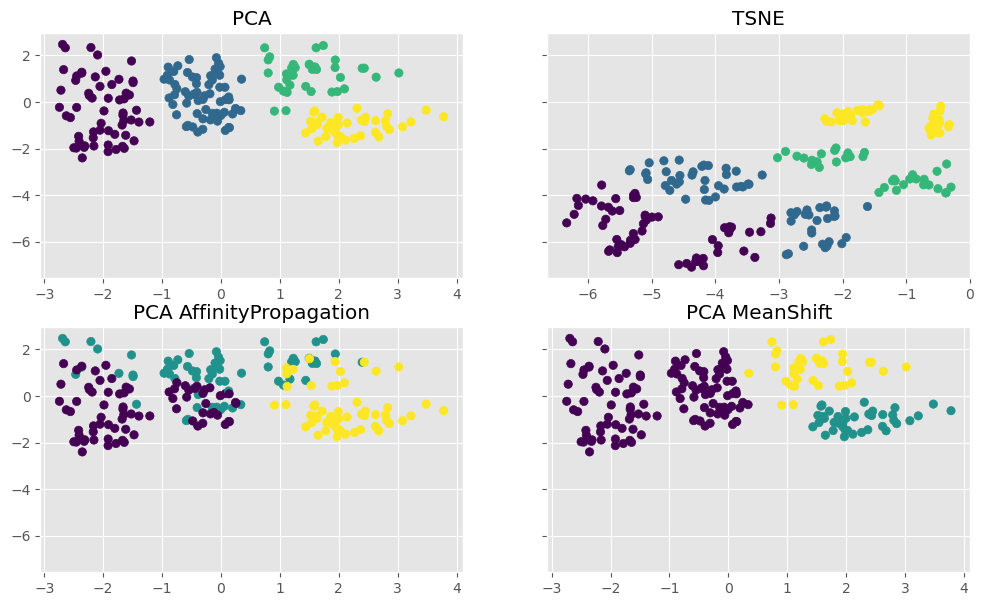

In [24]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = True)
ax1.set_title('PCA')
ax1.scatter(tb_pca[:,0], tb_pca[:,1],c = y_pred)

ax2.set_title('TSNE')
ax2.scatter(tb_tsne[:,0], tb_tsne[:,1],c = y_pred)

ax3.set_title("PCA AffinityPropagation")
ax3.scatter(tb_pca[:,0], tb_pca[:,1],c = y_pred_2)

ax4.set_title("PCA MeanShift")
ax4.scatter(tb_pca[:,0], tb_pca[:,1], c = y_pred_3)

plt.show()

#### Из графиков видно, что модели PCAAffinityPropagation и PCA-MeanShift PCA и TNSE показывают более неудачные результаты классификации чем модели PCA и TNSE. В качестве лучшей модели выберем модель PCA.

## №18. Сохраните модель в отдельный файл .pkl.

In [25]:
import joblib
joblib.dump(pca, "PCA.pkl")

['PCA.pkl']

In [26]:
pca_load = joblib.load("PCA.pkl")
pca_load

PCA(n_components=2, random_state=1)

## №19. Сохраните файл с предсказанием.

In [27]:
y_pred_series = pd.Series(y_pred, name = "Pred")
y_pred_series.to_csv("prediction.csv", header = True )
pd.read_csv("prediction.csv").drop("Unnamed: 0", axis = 1)

,Pred
0,0
1,0
2,0
3,0
4,0
...,...
195,3
196,2
197,3
198,2
